<div align="center">
<h1><img width="30" src="https://madewithml.com/static/images/rounded_logo.png">&nbsp;<a href="https://madewithml.com/">Made With ML</a></h1>
Applied ML · MLOps · Production
<br>
Join 30K+ developers in learning how to responsibly <a href="https://madewithml.com/about/">deliver value</a> with ML.
    <br>
</div>

<br>

<div align="center">
    <a target="_blank" href="https://madewithml.com"><img src="https://img.shields.io/badge/Subscribe-30K-brightgreen"></a>&nbsp;
    <a target="_blank" href="https://github.com/GokuMohandas/Made-With-ML"><img src="https://img.shields.io/github/stars/GokuMohandas/Made-With-ML.svg?style=social&label=Star"></a>&nbsp;
    <a target="_blank" href="https://www.linkedin.com/in/goku"><img src="https://img.shields.io/badge/style--5eba00.svg?label=LinkedIn&logo=linkedin&style=social"></a>&nbsp;
    <a target="_blank" href="https://twitter.com/GokuMohandas"><img src="https://img.shields.io/twitter/follow/GokuMohandas.svg?label=Follow&style=social"></a>
    <br>
    🔥&nbsp; Among the <a href="https://github.com/topics/deep-learning" target="_blank">top ML</a> repositories on GitHub
</div>

<br>
<hr>

# Data Quality
In this lesson we'll introduce and illusrate the fundamental concept of data quality.

<div align="left">
<a target="_blank" href="https://madewithml.com/courses/foundations/data-quality/"><img src="https://img.shields.io/badge/📖 Read-blog post-9cf"></a>&nbsp;
<a href="https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/09_Data_Quality.ipynb" role="button"><img src="https://img.shields.io/static/v1?label=&amp;message=View%20On%20GitHub&amp;color=586069&amp;logo=github&amp;labelColor=2f363d"></a>&nbsp;
<a href="https://colab.research.google.com/github/GokuMohandas/Made-With-ML/blob/main/notebooks/09_Data_Quality.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
</div>

In a nutshell, a machine learning model consumes input data and produces predictions. The quality of the predictions directly corresponds to the quality of data you train the model with; **garbage in, garbage out**. Check out this [article](https://venturebeat.com/2018/06/30/understanding-the-practical-applications-of-business-ai/) on where it makes sense to use AI and how to properly apply it.

We're going to go through all the concepts with concrete code examples and some synthesized data to train our models on. The task is to determine whether a tumor will be benign (harmless) or malignant (harmful) based on leukocyte (white blood cells) count and blood pressure. This is a synthetic dataset that we created and has no clinical relevance.

# Set up

In [ ]:
import numpy as np
import random

In [ ]:
SEED = 1234

In [ ]:
# Set seed for reproducibility
np.random.seed(SEED)
random.seed(SEED)

# Full dataset

We'll first train a model with the entire dataset. Later we'll remove a subset of the dataset and see the effect it has on our model.

## Data

### Load data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [ ]:
# Load data
url = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/tumors.csv"
df = pd.read_csv(url, header=0) # load
df = df.sample(frac=1).reset_index(drop=True) # shuffle
df.head()

,leukocyte_count,blood_pressure,tumor_class
0,15.335860,14.637535,benign
1,9.857535,14.518942,malignant
2,17.632579,15.869585,benign
3,18.369174,14.774547,benign
4,14.509367,15.892224,malignant


In [ ]:
# Define X and y
X = df[["leukocyte_count", "blood_pressure"]].values
y = df["tumor_class"].values
print ("X: ", np.shape(X))
print ("y: ", np.shape(y))

X:  (1000, 2)
y:  (1000,)


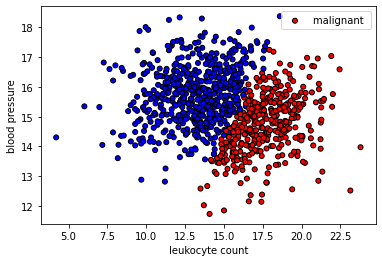

In [ ]:
# Plot data
colors = {"benign": "red", "malignant": "blue"}
plt.scatter(X[:, 0], X[:, 1], c=[colors[_y] for _y in y], s=25, edgecolors="k")
plt.xlabel('leukocyte count')
plt.ylabel('blood pressure')
plt.legend(["malignant", "benign"], loc="upper right")
plt.show()

We want to choose features that have strong predictive signal for our task. If you want to improve performance, you need to continuously do feature engineering by collecting and adding new signals. So you may run into a new feature that has high correlation (orthogonal signal) with your existing features but it may still possess some unique signal to boost your predictive performance. 

,leukocyte_count,blood_pressure
leukocyte_count,1.000000,-0.162875
blood_pressure,-0.162875,1.000000


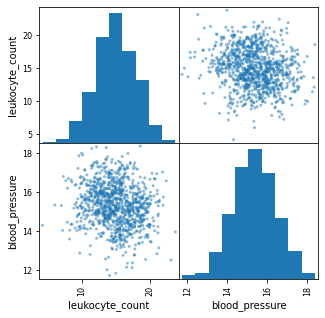

In [ ]:
# Correlation matrix
scatter_matrix(df, figsize=(5, 5));
df.corr()

### Split data

In [ ]:
import collections
from sklearn.model_selection import train_test_split

In [ ]:
TRAIN_SIZE = 0.70
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [ ]:
def train_val_test_split(X, y, train_size):
    """Split dataset into data splits."""
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=y, train_size=TRAIN_SIZE)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[0]} → {y_train[0]}")

X_train: (700, 2), y_train: (700,)
X_val: (150, 2), y_val: (150,)
X_test: (150, 2), y_test: (150,)
Sample point: [14.95081332 14.86441305] → malignant


### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Output vectorizer
label_encoder = LabelEncoder()

In [ ]:
# Fit on train data
label_encoder = label_encoder.fit(y_train)
classes = list(label_encoder.classes_)
print (f"classes: {classes}")

classes: ["benign", "malignant"]


In [ ]:
# Convert labels to tokens
print (f"y_train[0]: {y_train[0]}")
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)
print (f"y_train[0]: {y_train[0]}")

y_train[0]: malignant
y_train[0]: 1


In [ ]:
# Class weights
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"counts: {counts}\nweights: {class_weights}")

counts: [272 428]
weights: {0: 0.003676470588235294, 1: 0.002336448598130841}


### Standardize data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)

In [ ]:
# Apply scaler on training and test data (don't standardize outputs for classification)
X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

In [ ]:
# Check (means should be ~0 and std should be ~1)
print (f"X_test[0]: mean: {np.mean(X_test[:, 0], axis=0):.1f}, std: {np.std(X_test[:, 0], axis=0):.1f}")
print (f"X_test[1]: mean: {np.mean(X_test[:, 1], axis=0):.1f}, std: {np.std(X_test[:, 1], axis=0):.1f}")

X_test[0]: mean: -0.1, std: 1.0
X_test[1]: mean: -0.1, std: 1.0


## Modeling

In [ ]:
import torch

In [ ]:
# Set seed for reproducibility
torch.manual_seed(SEED)

### Model

In [ ]:
from torch import nn
import torch.nn.functional as F

In [ ]:
INPUT_DIM = 2 # X is 2-dimensional
HIDDEN_DIM = 100
NUM_CLASSES = 2

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)
        
    def forward(self, x_in, apply_softmax=False):
        z = F.relu(self.fc1(x_in)) # ReLU activaton function added!
        y_pred = self.fc2(z)
        if apply_softmax:
            y_pred = F.softmax(y_pred, dim=1) 
        return y_pred

In [ ]:
# Initialize model
model = MLP(input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIM, num_classes=NUM_CLASSES)
print (model.named_parameters)

<bound method Module.named_parameters of MLP(
  (fc1): Linear(in_features=2, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=2, bias=True)
)>


### Training

In [ ]:
from torch.optim import Adam

In [ ]:
LEARNING_RATE = 1e-3
NUM_EPOCHS = 5
BATCH_SIZE = 32

In [ ]:
# Define Loss
class_weights_tensor = torch.Tensor(list(class_weights.values()))
loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensor)

In [ ]:
# Accuracy
def accuracy_fn(y_pred, y_true):
    n_correct = torch.eq(y_pred, y_true).sum().item()
    accuracy = (n_correct / len(y_pred)) * 100
    return accuracy

In [ ]:
# Optimizer
optimizer = Adam(model.parameters(), lr=LEARNING_RATE) 

In [ ]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

In [ ]:
# Training
for epoch in range(NUM_EPOCHS*10):
    # Forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%10==0: 
        predictions = y_pred.max(dim=1)[1] # class
        accuracy = accuracy_fn(y_pred=predictions, y_true=y_train)
        print (f"Epoch: {epoch} | loss: {loss:.2f}, accuracy: {accuracy:.1f}")

Epoch: 0 | loss: 0.70, accuracy: 48.4
Epoch: 10 | loss: 0.54, accuracy: 92.3
Epoch: 20 | loss: 0.43, accuracy: 97.4
Epoch: 30 | loss: 0.35, accuracy: 97.4
Epoch: 40 | loss: 0.30, accuracy: 97.4


### Evaluation

In [ ]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
def get_performance(y_true, y_pred, classes):
    """Per-class performance metrics."""
    # Performance
    performance = {"overall": {}, "class": {}}

    # Overall performance
    metrics = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    performance["overall"]["precision"] = metrics[0]
    performance["overall"]["recall"] = metrics[1]
    performance["overall"]["f1"] = metrics[2]
    performance["overall"]["num_samples"] = np.float64(len(y_true))

    # Per-class performance
    metrics = precision_recall_fscore_support(y_true, y_pred, average=None)
    for i in range(len(classes)):
        performance["class"][classes[i]] = {
            "precision": metrics[0][i],
            "recall": metrics[1][i],
            "f1": metrics[2][i],
            "num_samples": np.float64(metrics[3][i]),
        }

    return performance

In [ ]:
# Predictions
y_prob = model(X_test, apply_softmax=True)
y_pred = y_prob.max(dim=1)[1]

In [ ]:
# Performance
performance = get_performance(y_true=y_test, y_pred=y_pred, classes=classes)
print (json.dumps(performance, indent=2))

{
  "overall": {
    "precision": 0.9663271080928126,
    "recall": 0.9632683658170915,
    "f1": 0.9647473560517039,
    "num_samples": 150.0
  },
  "class": {
    "benign": {
      "precision": 0.9649122807017544,
      "recall": 0.9482758620689655,
      "f1": 0.9565217391304347,
      "num_samples": 58.0
    },
    "malignant": {
      "precision": 0.967741935483871,
      "recall": 0.9782608695652174,
      "f1": 0.972972972972973,
      "num_samples": 92.0
    }
  }
}


We're going to plot a point, which we know belongs to the malignant tumor class. Our well trained model here would accurately predict that it is indeed a malignant tumor!

In [ ]:
def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = plt.cm.Spectral
    
    X_test = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    y_pred = model(X_test, apply_softmax=True)
    _, y_pred = y_pred.max(dim=1)
    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

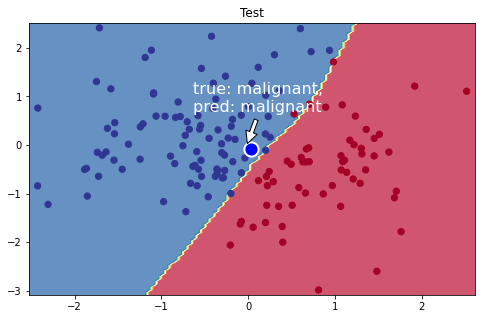

In [ ]:
# Visualize the decision boundary
plt.figure(figsize=(8,5))
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=X_test, y=y_test)

# Sample point near the decision boundary
mean_leukocyte_count, mean_blood_pressure = X_scaler.transform(
    [[np.mean(df.leukocyte_count), np.mean(df.blood_pressure)]])[0]
plt.scatter(mean_leukocyte_count+0.05, mean_blood_pressure-0.05, s=200, 
            c="b", edgecolor="w", linewidth=2)

# Annotate
plt.annotate("true: malignant,\npred: malignant",
             color="white",
             xy=(mean_leukocyte_count, mean_blood_pressure),
             xytext=(0.4, 0.65),
             textcoords="figure fraction",
             fontsize=16,
             arrowprops=dict(facecolor="white", shrink=0.1))
plt.show()

Great! We received great performances on both our train and test data splits. We're going to use this dataset to show the importance of data quality.

# Reduced dataset

Let's remove some training data near the decision boundary and see how robust the model is now.

## Data

### Load data

In [ ]:
# Raw reduced data
url = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/tumors_reduced.csv"
df_reduced = pd.read_csv(url, header=0) # load
df_reduced = df_reduced.sample(frac=1).reset_index(drop=True) # shuffle
df_reduced.head()

,leukocyte_count,blood_pressure,tumor_class
0,16.795186,14.434741,benign
1,13.472969,15.250393,malignant
2,9.840450,16.434717,malignant
3,16.390730,14.419258,benign
4,13.367974,15.741790,malignant


In [ ]:
# Define X and y
X = df_reduced[["leukocyte_count", "blood_pressure"]].values
y = df_reduced["tumor_class"].values
print ("X: ", np.shape(X))
print ("y: ", np.shape(y))

X:  (720, 2)
y:  (720,)


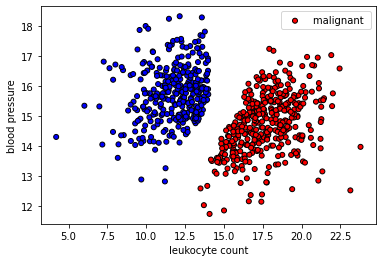

In [ ]:
# Plot data
colors = {"benign": "red", "malignant": "blue"}
plt.scatter(X[:, 0], X[:, 1], c=[colors[_y] for _y in y], s=25, edgecolors="k")
plt.xlabel('leukocyte count')
plt.ylabel('blood pressure')
plt.legend(["malignant", "benign"], loc="upper right")
plt.show()

### Split data

In [ ]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=y, train_size=TRAIN_SIZE)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[0]} → {y_train[0]}")

X_train: (503, 2), y_train: (503,)
X_val: (108, 2), y_val: (108,)
X_test: (109, 2), y_test: (109,)
Sample point: [18.34509397 14.25516163] → benign


### Label encoding

In [ ]:
# Encode class labels
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
num_classes = len(label_encoder.classes_)
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [ ]:
# Class weights
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"counts: {counts}\nweights: {class_weights}")

counts: [272 231]
weights: {0: 0.003676470588235294, 1: 0.004329004329004329}


### Standardize data

In [ ]:
# Standardize inputs using training data
X_scaler = StandardScaler().fit(X_train)
X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

## Modeling

### Model

In [ ]:
# Initialize model
model = MLP(input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIM, num_classes=NUM_CLASSES)

### Training

In [ ]:
# Define Loss
class_weights_tensor = torch.Tensor(list(class_weights.values()))
loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensor)

In [ ]:
# Optimizer
optimizer = Adam(model.parameters(), lr=LEARNING_RATE) 

In [ ]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

In [ ]:
# Training
for epoch in range(NUM_EPOCHS*10):
    # Forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%10==0: 
        predictions = y_pred.max(dim=1)[1] # class
        accuracy = accuracy_fn(y_pred=predictions, y_true=y_train)
        print (f"Epoch: {epoch} | loss: {loss:.2f}, accuracy: {accuracy:.1f}")

Epoch: 0 | loss: 0.67, accuracy: 71.4
Epoch: 10 | loss: 0.52, accuracy: 96.8
Epoch: 20 | loss: 0.41, accuracy: 100.0
Epoch: 30 | loss: 0.33, accuracy: 100.0
Epoch: 40 | loss: 0.27, accuracy: 100.0


### Evaluation

In [ ]:
# Predictions
y_prob = model(X_test, apply_softmax=True)
y_pred = y_prob.max(dim=1)[1]

In [ ]:
# Performance
performance = get_performance(y_true=y_test, y_pred=y_pred, classes=classes)
print (json.dumps(performance, indent=2))

{
  "overall": {
    "precision": 1.0,
    "recall": 1.0,
    "f1": 1.0,
    "num_samples": 109.0
  },
  "class": {
    "benign": {
      "precision": 1.0,
      "recall": 1.0,
      "f1": 1.0,
      "num_samples": 59.0
    },
    "malignant": {
      "precision": 1.0,
      "recall": 1.0,
      "f1": 1.0,
      "num_samples": 50.0
    }
  }
}


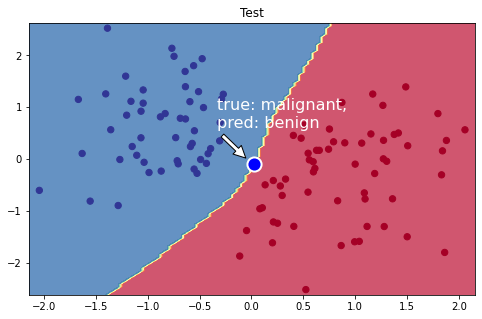

In [ ]:
# Visualize the decision boundary
plt.figure(figsize=(8,5))
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=X_test, y=y_test)

# Sample point near the decision boundary (same point as before)
plt.scatter(mean_leukocyte_count+0.05, mean_blood_pressure-0.05, s=200, 
            c="b", edgecolor="w", linewidth=2)

# Annotate
plt.annotate("true: malignant,\npred: benign",
             color="white",
             xy=(mean_leukocyte_count, mean_blood_pressure),
             xytext=(0.45, 0.60),
             textcoords="figure fraction",
             fontsize=16,
             arrowprops=dict(facecolor="white", shrink=0.1))
plt.show()

This is a very fragile but highly realistic scenario. Based on our reduced synthetic dataset, we have achieved a model that generalized really well on the test data. But when we ask for the prediction for the same point tested earlier (which we known is malignant), the prediction is now a benign tumor. We would have completely missed the tumor. To mitigate this, we can:
1. Get more data around the space we are concerned about
2. Consume predictions with caution when they are close to the decision boundary

# Takeaway

Models are not crystal balls. So it's important that before any machine learning, we really look at our data and ask ourselves if it is truly representative for the task we want to solve. The model itself may fit really well and generalize well on your data but if the data is of poor quality to begin with, the model cannot be trusted.

Once you are confident that your data is of good quality, you can finally start thinking about modeling. The type of model you choose depends on many factors, including the task, type of data, complexity required, etc. 

So once you figure out what type of model your task needs, start with simple models and then slowly add complexity. You don’t want to start with neural networks right away because that may not be right model for your data and task. Striking this balance in model complexity is one of the key tasks of your data scientists. **simple models → complex models**

